### Clustering (K-Means)

Exemple simple en utilisant le dataset 'ruspini'

**Importations utiles**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

**Données**

In [2]:
df = pd.read_csv('Ruspini.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
df = df.rename(columns = {'X': 'Indices'})
df = df.set_index('Indices')

In [3]:
df.head()

,x,y
Indices,,
1,4,53
2,5,63
3,10,59
4,9,77
5,13,49


**Quelques visualisations**

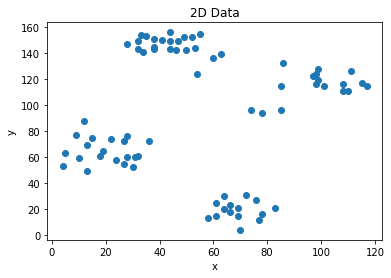

In [4]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Data');

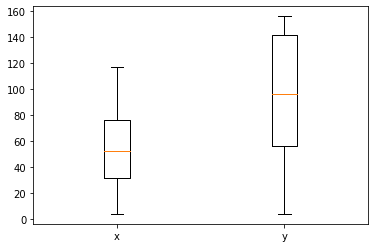

In [5]:
plt.boxplot([df['x'], df['y']], labels = ['x', 'y']);

**Modélisation**

In [6]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
centroids = kmeans.cluster_centers_  # Centroïdes
labels = kmeans.labels_  # Prédictions

On va utiliser la "méthode du coude" (elbow method) pour trouver le nombre de clusters optimal :

In [7]:
distorsions = []
for n_clusters in range(2,6):
    cluster = KMeans(n_clusters = n_clusters)
    cluster.fit(df)
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis = 1))
                          / np.size(df, axis = 0))

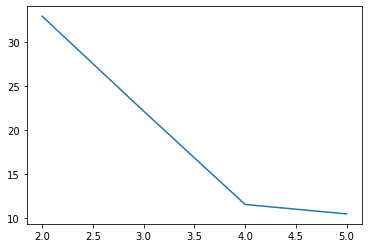

In [8]:
plt.plot(range(2,6), distorsions);

On voit ici que le nombre de cluster optimal est 4 (cohérent avec le tout premier graphique).

In [9]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

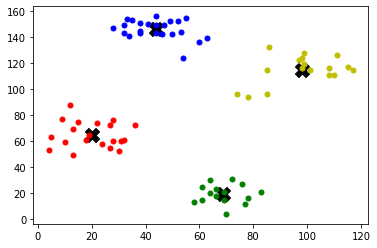

In [10]:
# Visualisation des clusters et des centroïdes
colors = ['r.', 'b.', 'y.', 'g.']

# Clusters
for i in range(len(df)):
    plt.plot(df.iloc[i, 0], df.iloc[i, 1], colors[labels[i]], markersize = 10)
    
# Centroïdes
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'black', marker='X', s = 200);

### Clustering hiérarchique (CAH)

**Données**

In [11]:
df = pd.read_csv('fromage.txt', sep = '\t', index_col = 0)
df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


**Boxplot des données**

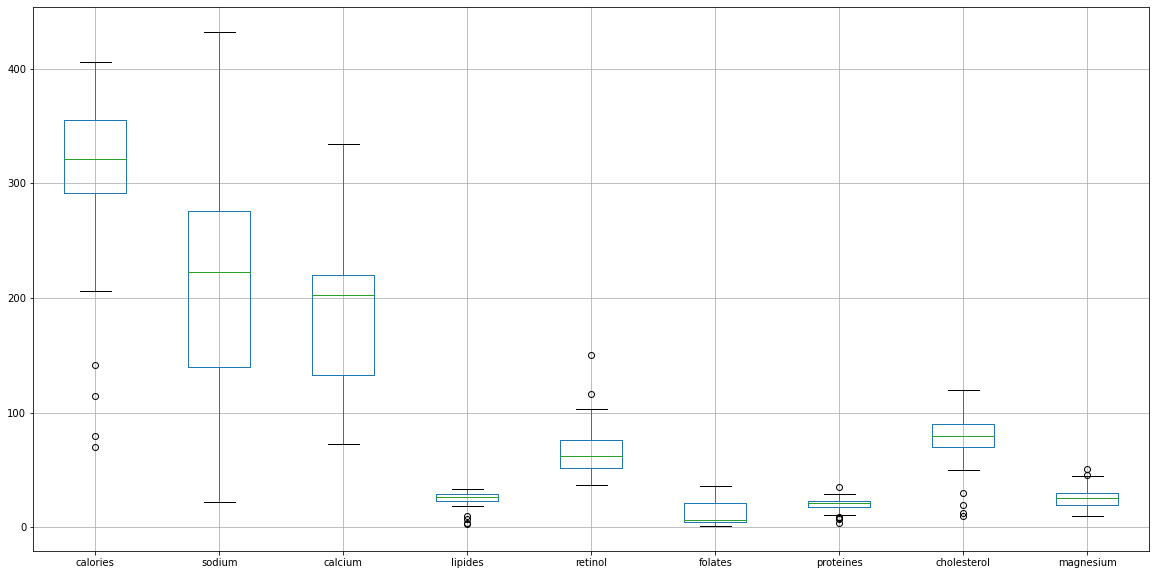

In [12]:
plt.figure(figsize = (20,10))
df.boxplot(column = list(df.columns));

In [13]:
# Normalisation des données
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[7.26190476e-01, 8.08536585e-01, 0.00000000e+00, 7.65886288e-01,
        1.27865961e-01, 8.26704545e-01, 5.34810127e-01, 5.45454545e-01,
        2.43902439e-01],
       [7.26190476e-01, 5.26829268e-01, 5.23664122e-01, 7.25752508e-01,
        2.34567901e-01, 1.47727273e-01, 5.85443038e-01, 5.45454545e-01,
        4.14634146e-01],
       [9.85119048e-01, 2.19512195e-01, 7.12977099e-01, 1.00000000e+00,
        1.56966490e-01, 0.00000000e+00, 7.12025316e-01, 1.00000000e+00,
        7.56097561e-01],
       [8.09523810e-01, 7.65853659e-01, 5.28625954e-01, 8.52842809e-01,
        0.00000000e+00, 7.47159091e-01, 5.09493671e-01, 7.27272727e-01,
        4.14634146e-01],
       [5.77380952e-01, 7.12195122e-01, 5.46946565e-01, 5.38461538e-01,
        5.81128748e-01, 1.00000000e+00, 6.10759494e-01, 4.54545455e-01,
        2.43902439e-01],
       [8.83928571e-01, 5.70731707e-01, 7.30534351e-01, 8.49498328e-01,
        1.03174603e-01, 1.27840909e-01, 5.98101266e-01, 7.27272727e-01,
        4.8

**Classification mixte**

Première étape de la classification mixte : on applique un algorithme de KMeans sur les observations de base.

In [14]:
kmeans1 = KMeans(n_clusters = 29)
kmeans1.fit(df)

KMeans(n_clusters=29)

In [15]:
# On extrait les centroïdes :
centroid_kmeans1 = kmeans1.cluster_centers_

# Et les prédictions :
kmeans1_predictions = kmeans1.labels_

**Classification ascendante hiérarchique (CAH)**

On va ici utiliser une CAH sur les centroïdes issus de l'étape précédente : nous allons regrouper les centroïdes obtenus en clusters (et non les échantillons).
On va utiliser un dendrogramme pour connaître le nombre de cluster optimal :

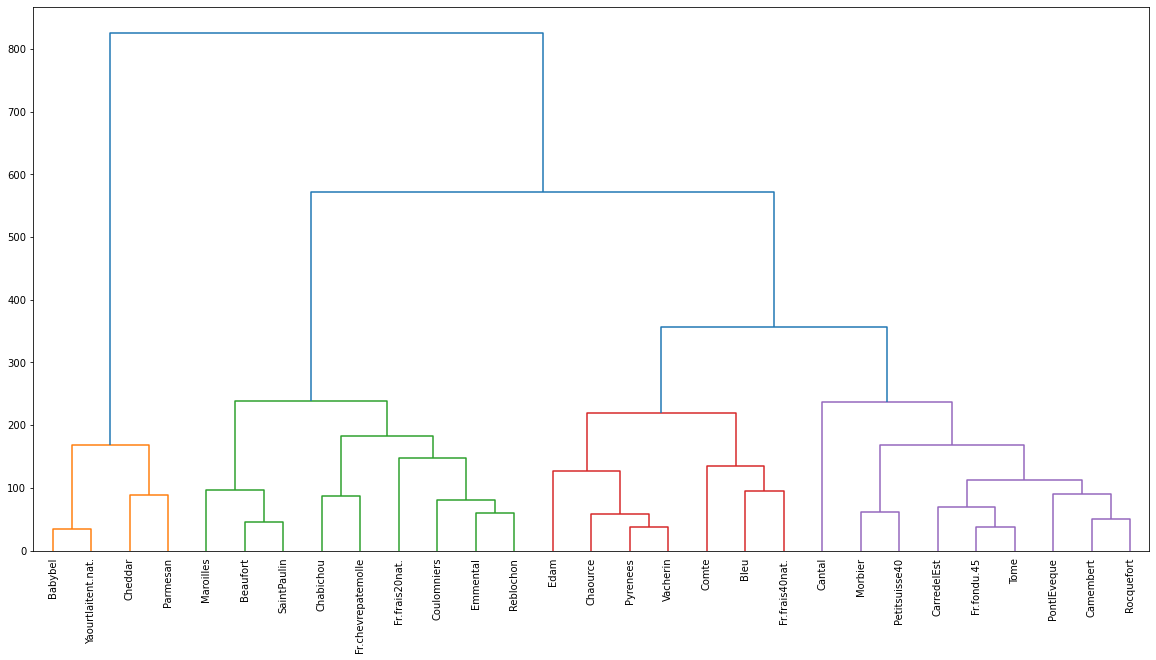

In [16]:
plt.figure(figsize = (20,10))
Z = linkage(centroid_kmeans1, method = 'ward', metric = 'euclidean')
dendrogram(Z, labels = df.index, leaf_rotation = 90, color_threshold = 290);

Ici, le dendrogramme suggère un découpage en 2 groupes (le plus grand "saut" entre deux clusters consécutifs étant le premier).

In [17]:
cluster = AgglomerativeClustering(n_clusters = 2)
cluster.fit(centroid_kmeans1)
cah_clusters = cluster.labels_

On va maintenant associer à chaque observation du jeu de départ un cluster issu de la CAH : on fait la correspondance entre les clusters de kmeans1 avec les clusters de la CAH pour associer un cluster à chaque observation :

In [18]:
cluster_CAH = []
for i in kmeans1_predictions:
    cluster_CAH.append(cah_clusters[i])

# On crée une nouvelle colonne contenant le cluster CAH associé :
df['cluster_CAH'] = cluster_CAH

In [19]:
# On calcule les centroïdes de chaque cluster obtenu par CAH :
centroids_CAH = df.groupby('cluster_CAH').mean()

In [20]:
# On supprime la colonne créée précédemment :
df.drop('cluster_CAH', axis = 1, inplace = True)

On va maintenant réentraîner un algorithme de KMeans en prenant comme centroïdes initiaux ceux calculés précédemment :

In [21]:
kmeans2 = KMeans(n_clusters = 2, init = centroids_CAH)
kmeans2.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=             calories  sodium  calcium  lipides  retinol  folates  proteines  \
cluster_CAH                                                                    
0              331.76  236.54  194.052   27.020   69.548   12.456     22.244   
1              101.75   44.75  133.750    6.275   55.150   16.475      7.200   

             cholesterol  magnesium  
cluster_CAH                          
0                  83.60      29.48  
1                  18.25      11.25  ,
       n_clusters=2)

In [22]:
# On extrait les centroïdes :
centroid_kmeans2 = kmeans2.cluster_centers_

# Et les prédictions :
kmeans2_predictions = kmeans2.labels_

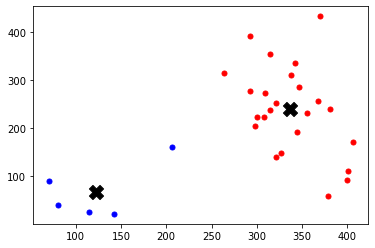

In [23]:
# Visualisation des clusters et des centroïdes
colors = ['r.', 'b.']

# Clusters
for i in range(len(df)):
    plt.plot(df.iloc[i, 0], df.iloc[i, 1], colors[kmeans2_predictions[i]], markersize = 10)
    
# Centroïdes
plt.scatter(centroid_kmeans2[:, 0], centroid_kmeans2[:, 1], color = 'black', marker='X', s = 200);

Success !